# In Depth 3 - Drawing DiHypergraphs

Here we show the fuctionalities and parameters of `xgi.draw_bipartite()`.  It is similar to the [networkx](https://networkx.org/documentation/stable/reference/drawing.html) corresponding function (+ some bonus) and heavily relies on [matplotlib](https://matplotlib.org/)'s Collection plotting.

In [1]:
import matplotlib.pyplot as plt

import xgi

Les us first create a small toy hypergraph containing edges of different sizes.

In [2]:
diedges = [({0, 1}, {2}), ({1}, {4}), ({2, 3}, {4, 5})]
DH = xgi.DiHypergraph(diedges)

(<AxesSubplot: >,
 (<matplotlib.collections.PathCollection at 0x2a0b7da80>,
  <matplotlib.collections.PathCollection at 0x2a0b7dc00>))

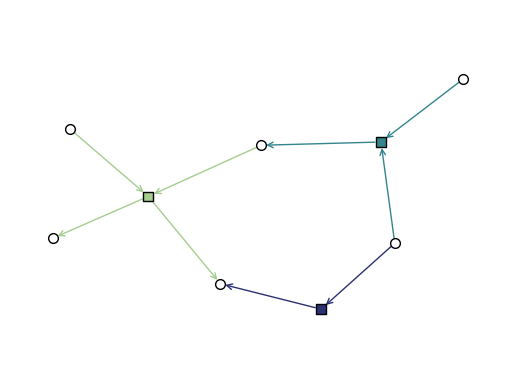

In [3]:
xgi.draw_bipartite(DH)

## Basics

Notice that this function returns a tuple `(ax, collections)` where `collections` is a tuple `(node_collection, edge_node_collection)`. The collections can be used to plot colorbars as we will see later.

The color, linewidth, transparancy, and style of the hyperedges can all be customised, for example with single values:

(<AxesSubplot: >,
 (<matplotlib.collections.PathCollection at 0x2a0cf9b40>,
  <matplotlib.collections.PathCollection at 0x2a0b4faf0>))

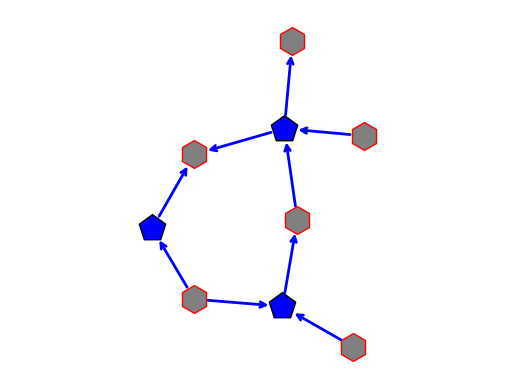

In [4]:
xgi.draw_bipartite(
    DH,
    node_shape="h",
    node_fc="grey",
    node_ec="r",
    node_size=20,
    edge_marker_size=20,
    edge_marker_shape="p",
    dyad_lw=2,
    arrowsize=10,
    edge_marker_fc="b",
    dyad_color="b",
)

Or with multiple values:

(<AxesSubplot: >,
 (<matplotlib.collections.PathCollection at 0x2a0d69480>,
  <matplotlib.collections.PathCollection at 0x109d574f0>))

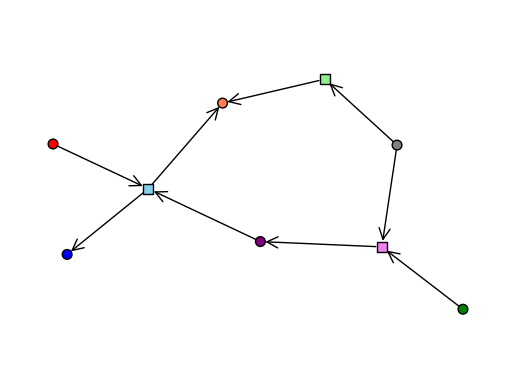

In [5]:
xgi.draw_bipartite(
    DH,
    node_fc=["g", "grey", "purple", "coral", "r", "b"],
    arrowsize=20,
    edge_marker_fc=["violet", "lightgreen", "skyblue"],
    dyad_color="k",
)

Adding node and edge labels:

(<AxesSubplot: >,
 (<matplotlib.collections.PathCollection at 0x2a0dd0f70>,
  <matplotlib.collections.PathCollection at 0x2a0cd47c0>))

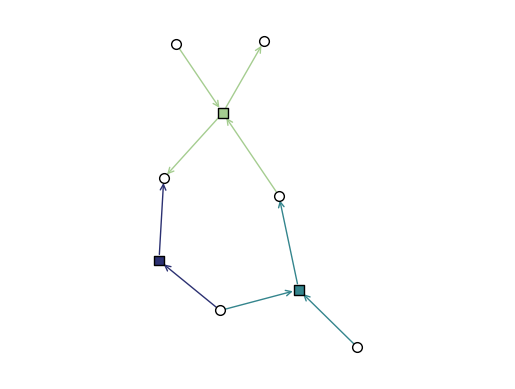

In [6]:
xgi.draw_bipartite(DH)

## Arrays of floats and colormaps

In XGI, you can easily color hyperedges according to an EdgeStat, or just an array or a dict with float values:

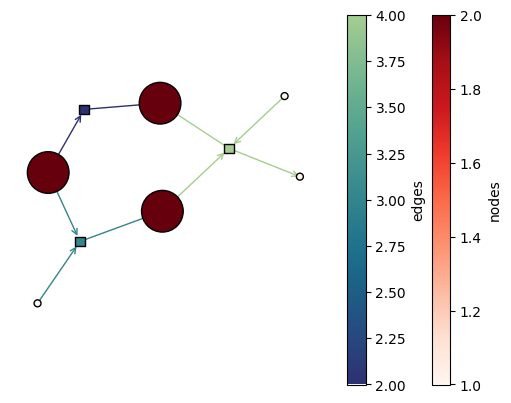

In [7]:
ax, collections = xgi.draw_bipartite(
    DH,
    node_fc=DH.nodes.degree,
    edge_marker_fc=DH.edges.size,
    node_size=DH.nodes.degree,
)

node_coll, edge_marker_coll = collections

plt.colorbar(node_coll, label="nodes")
plt.colorbar(edge_marker_coll, label="edges")

By default, the colormaps used are "crest_r" and "Reds". These can be changed:

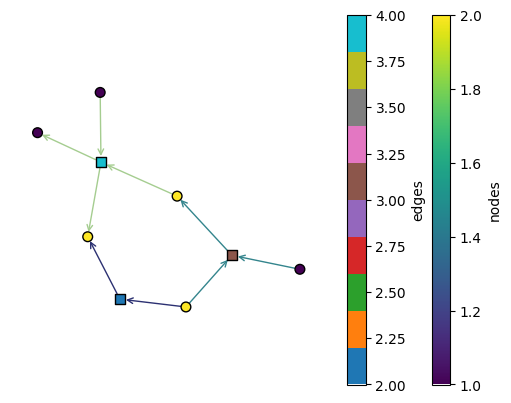

In [8]:
ax, collections = xgi.draw_bipartite(
    DH,
    node_fc=DH.nodes.degree,
    edge_marker_fc=DH.edges.size,
    node_fc_cmap="viridis",
    edge_marker_fc_cmap="tab10",
)

node_coll, edge_marker_coll = collections

plt.colorbar(node_coll, label="nodes")
plt.colorbar(edge_marker_coll, label="edges")

## Styling of arrows

By default, the `arrowstyle` used is `"-|>"`:

(<AxesSubplot: >,
 (<matplotlib.collections.PathCollection at 0x2a1045450>,
  <matplotlib.collections.PathCollection at 0x2a0cd40d0>))

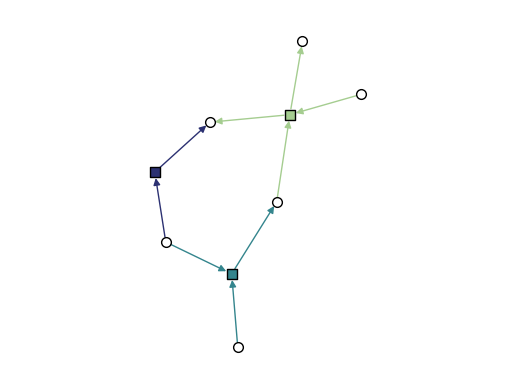

In [9]:
xgi.draw_bipartite(DH, arrowstyle="-|>")

Other styles can be used, see the full list from [Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.FancyArrowPatch.html#matplotlib.patches.FancyArrowPatch)

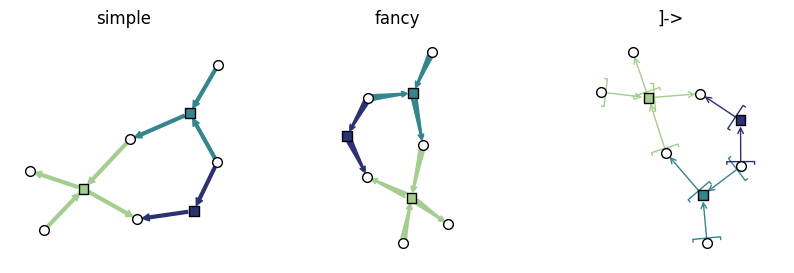

In [10]:
styles = ["simple", "fancy", "]->"]

fig, axs = plt.subplots(1, len(styles), figsize=(10, 3))

for i, style in enumerate(styles):
    ax = axs[i]
    xgi.draw_bipartite(DH, arrowstyle=style, ax=ax)
    ax.set_title(f"{style}")

There is a second argument to style arrows: `connectionstyle`. The default value is `"arc3"`, but other values can be used

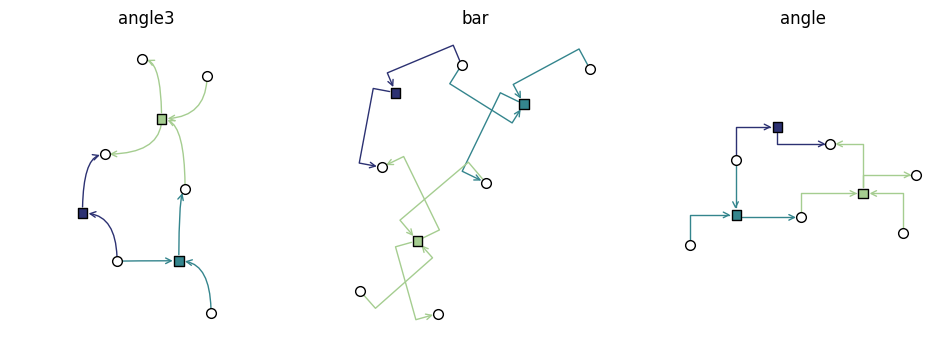

In [11]:
styles = ["angle3", "bar", "angle"]

fig, axs = plt.subplots(1, len(styles), figsize=(12, 4))

for i, style in enumerate(styles):
    ax = axs[i]
    xgi.draw_bipartite(DH, connectionstyle=style, ax=ax)
    ax.set_title(f"{style}")

## Layout

The initial layout is computed based on the bipartite network representation of the hypergraph:

(<AxesSubplot: >,
 (<matplotlib.collections.PathCollection at 0x2a1088430>,
  <matplotlib.collections.PathCollection at 0x2a12e8af0>))

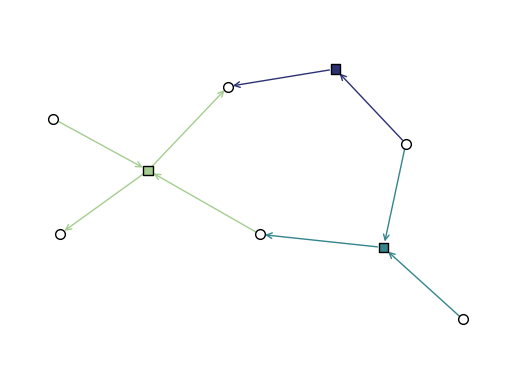

In [12]:
pos = xgi.bipartite_spring_layout(DH)
xgi.draw_bipartite(DH, pos=pos)

A larger example

In [13]:
edges = [
    [[8], [0]],
    [[1, 2], [0]],
    [[0, 3], [1]],
    [[1, 3], [2]],
    [[1, 5], [3]],
    [[2, 5], [4]],
    [[3, 4], [5, 6]],
    [[6, 7], [5]],
    [[5, 8], [6]],
    [[6, 8], [7]],
    [[6, 0], [8]],
    [[7, 0], [9]],
]

DH = xgi.DiHypergraph(edges)

(<AxesSubplot: >,
 (<matplotlib.collections.PathCollection at 0x2a134c970>,
  <matplotlib.collections.PathCollection at 0x2a134cdc0>))

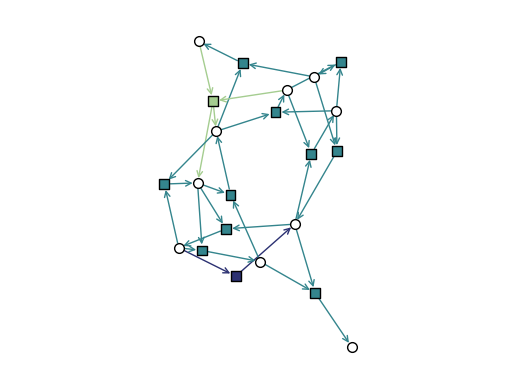

In [14]:
pos = xgi.bipartite_spring_layout(DH)
xgi.draw_bipartite(DH, pos=pos)

But, we can also place the edge markers at the barycenters of the node positions using `edge_positions_from_barycenters`:

In [15]:
node_pos = xgi.circular_layout(DH)
edge_pos = xgi.edge_positions_from_barycenters(DH, node_pos)

(<AxesSubplot: >,
 (<matplotlib.collections.PathCollection at 0x2a13dcd90>,
  <matplotlib.collections.PathCollection at 0x2a13dd1e0>))

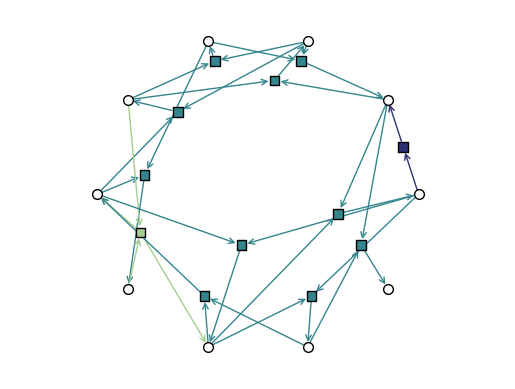

In [16]:
xgi.draw_bipartite(DH, pos=(node_pos, edge_pos))